## Packages and paths

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from datetime import datetime

In [2]:
data_source_path = 'data/source/'
data_output_path = 'data/'

## Static definitions

In [76]:
treatment_countries = ['Iceland', 'Ireland', 'France', 'Portugal', 'Switzerland']

donor_countries = ['Austria', 'Belgium', 'Bulgaria', 
#                    'Cyprus', 
                   'Croatia', 'Czech Republic',
                   'Germany', 'Greece', 'Hungary', 'Italy', 'Lithuania', 'Netherlands', 
                   'Romania', 'Slovakia', 'Spain']

incl_countries = treatment_countries + donor_countries
incl_countries.sort()

print(len(incl_countries))
print(incl_countries)

19
['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Czech Republic', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Lithuania', 'Netherlands', 'Portugal', 'Romania', 'Slovakia', 'Spain', 'Switzerland']


In [77]:
incl_years = range(2000, 2020)

print(list(incl_years))

[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


## Functions

In [78]:
def month_to_num(month):
    return {
            'Jan': 1,
            'Feb': 2,
            'Mar': 3,
            'Apr': 4,
            'May': 5,
            'Jun': 6,
            'Jul': 7,
            'Aug': 8,
            'Sep': 9, 
            'Oct': 10,
            'Nov': 11,
            'Dec': 12
    }[month]

In [79]:
def quarter_to_month(quarter):
    if quarter == 1:
        month = 1
    elif quarter == 2:
        month = 4
    elif quarter == 3:
        month = 7
    elif quarter == 4:
        month = 12
    return month

## Monthly CO2 data

In [117]:
var = 'co2_m'
diff_level = 12

# read
df = pd.read_csv(f'{data_output_path}{var}.csv', index_col=0)
df
# for country in df['country'].unique():
#     df_country = np.log(df[df['country']==country].set_index('date',drop=True)[var]).diff(diff_level).dropna()
#     adf_country = adfuller(df_country)
#     if adf_country[1] < 0.1:
#         print(f'{country}: Stationary')
#         pass
#     if adf_country[1] >= 0.1:
#         print(f'{country}: Non-stationary ({round(adf_country[1], 3)})')

# np.log(df[df['country']=='Spain'].set_index('date',drop=True)[var]).diff(diff_level).dropna().plot();

,country,date,co2_m
0,Austria,2000-01-01,9726927.646
1,Austria,2000-02-01,8532685.059
2,Austria,2000-03-01,8134567.013
3,Austria,2000-04-01,6546737.758
4,Austria,2000-05-01,5603261.736
...,...,...,...
4555,Switzerland,2019-08-01,2793634.688
4556,Switzerland,2019-09-01,3445179.636
4557,Switzerland,2019-10-01,3819263.405
4558,Switzerland,2019-11-01,4487169.820


In [118]:
df_neth = df[df['country']=='Netherlands']
df_neth['year'] = pd.to_datetime(df_neth['date']).dt.year

df_neth.groupby('year').sum()['co2_m']
# df[df['country']=='Netherlands'].set_index('date')['co2_m'].plot()

C:\Users\Bas\AppData\Local\Temp\ipykernel_25808\1931880101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_neth['year'] = pd.to_datetime(df_neth['date']).dt.year


year
2000    1.817788e+08
2001    1.867306e+08
2002    1.877745e+08
2003    1.897458e+08
2004    1.931176e+08
2005    1.901200e+08
2006    1.860358e+08
2007    1.875129e+08
2008    1.899811e+08
2009    1.865765e+08
2010    1.985725e+08
2011    1.869015e+08
2012    1.863921e+08
2013    1.856265e+08
2014    1.779121e+08
2015    1.854119e+08
2016    1.863759e+08
2017    1.851158e+08
2018    1.801398e+08
2019    1.772048e+08
Name: co2_m, dtype: float64

# Quarterly GDP data

Austria: Stationary
Belgium: Stationary
Bulgaria: Stationary
Croatia: Stationary
Czech Republic: Stationary
France: Non-stationary (0.217)
Germany: Stationary
Greece: Non-stationary (0.101)
Hungary: Stationary
Iceland: Stationary
Ireland: Non-stationary (0.298)
Italy: Stationary
Lithuania: Stationary
Netherlands: Non-stationary (0.426)
Portugal: Non-stationary (0.16)
Romania: Stationary
Slovakia: Stationary
Spain: Stationary
Switzerland: Stationary


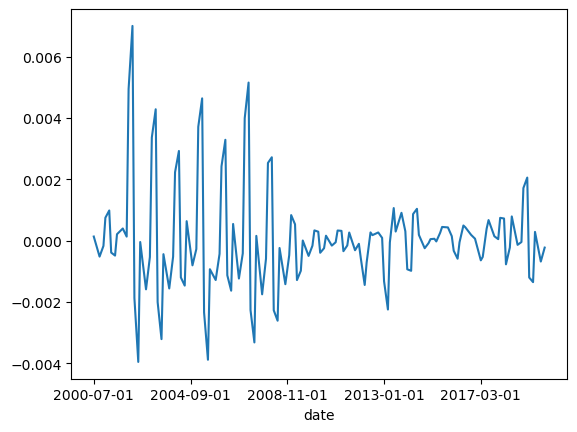

In [94]:
var = 'pop_m'
diff_level = 3

# read
df = pd.read_csv(f'{data_output_path}{var}.csv', index_col=0)

for country in df['country'].unique():
    df_country = np.log(df[df['country']==country].set_index('date',drop=True)[var]).diff(diff_level).diff(diff_level).dropna()
    adf_country = adfuller(df_country)
    if adf_country[1] < 0.1:
        print(f'{country}: Stationary')
        pass
    if adf_country[1] >= 0.1:
        print(f'{country}: Non-stationary ({round(adf_country[1], 3)})')

np.log(df[df['country']=='Spain'].set_index('date',drop=True)[var]).diff(diff_level).diff(diff_level).dropna().plot();

# Quarterly GDP data

Austria: Stationary
Belgium: Stationary
Bulgaria: Stationary
Croatia: Non-stationary (0.1)
Czech Republic: Stationary
France: Stationary
Germany: Stationary
Greece: Stationary
Hungary: Stationary
Iceland: Stationary
Ireland: Stationary
Italy: Stationary
Lithuania: Stationary
Netherlands: Stationary
Portugal: Stationary
Romania: Stationary
Slovakia: Stationary
Spain: Non-stationary (0.132)
Switzerland: Stationary


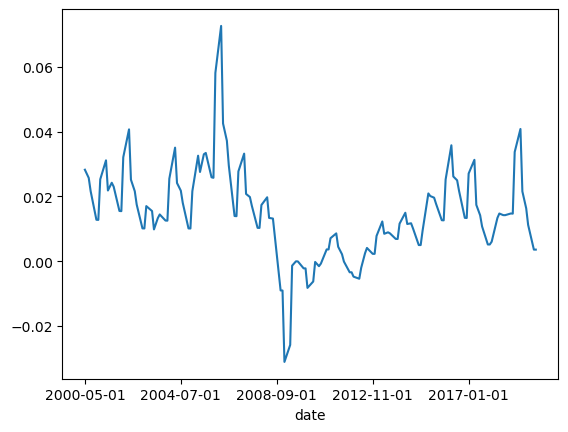

In [95]:
var = 'gdp_m'
diff_level = 4

# read
df = pd.read_csv(f'{data_output_path}{var}.csv', index_col=0)

for country in df['country'].unique():
    df_country = np.log(df[df['country']==country].set_index('date',drop=True)[var]).diff(diff_level).dropna()
    adf_country = adfuller(df_country)
    if adf_country[1] < 0.1:
        print(f'{country}: Stationary')
        pass
    if adf_country[1] >= 0.1:
        print(f'{country}: Non-stationary ({round(adf_country[1], 3)})')

np.log(df[df['country']=='Spain'].set_index('date',drop=True)[var]).diff(diff_level).dropna().plot();

# Correlation matrix

In [136]:
df

,date,co2_m,pop_m,gdp_m,co2_m_cap,gdp_m_cap
country,,,,,,
Austria,2000-01-01,9726927.646,8003000.0,2.309478e+11,1.215410,28857.653380
Austria,2000-02-01,8532685.059,8004700.0,2.321217e+11,1.065959,28998.180236
Austria,2000-03-01,8134567.013,8006400.0,2.332957e+11,1.016008,29138.647415
Austria,2000-04-01,6546737.758,8008100.0,2.344696e+11,0.817514,29279.054957
Austria,2000-05-01,5603261.736,8010100.0,2.352176e+11,0.699525,29365.122366
...,...,...,...,...,...,...
Switzerland,2019-08-01,2793634.688,8589980.0,6.281104e+11,0.325220,73121.285498
Switzerland,2019-09-01,3445179.636,8593460.0,6.291429e+11,0.400907,73211.821548
Switzerland,2019-10-01,3819263.405,8596940.0,6.301753e+11,0.444258,73302.284301


In [137]:
total_df = 'total_monthly_stat'

# read
df = pd.read_csv(f'{data_output_path}{total_df}.csv', index_col=0)

corr_matrix = df.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

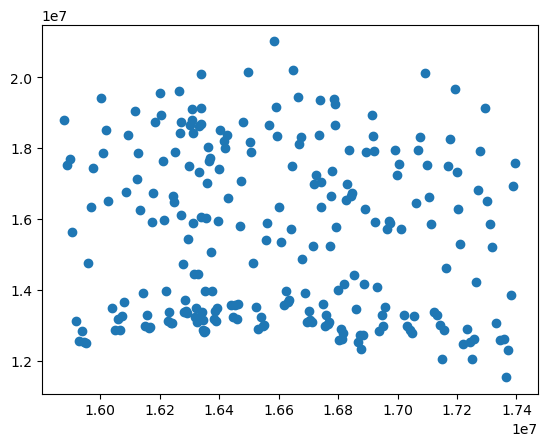

In [133]:
df_neth = df[df.index=='Netherlands']
plt.scatter(df_neth['pop_m'], df_neth['co2_m'])

In [134]:
np.corr(['pop_m'], df_neth['co2_m'])

AttributeError: module 'numpy' has no attribute 'corr'